In [1]:
import pandas as pd
from prophet import Prophet

/home/vscode/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/workspaces/mxn-usd-predictor1/src/processed_data/clean_test.csv')
df.head()

,Date,Open,High,Low,Close
0,2024-07-31 00:00:00+01:00,18.752800,18.941210,18.571409,18.752800
1,2024-08-01 00:00:00+01:00,18.640039,18.721609,18.429279,18.640039
2,2024-08-02 00:00:00+01:00,18.923800,19.174601,18.871901,18.923800
3,2024-08-05 00:00:00+01:00,19.528431,20.147791,19.372259,19.528431
4,2024-08-06 00:00:00+01:00,19.195021,19.508730,19.138889,19.195021


In [15]:
import pandas as pd
from prophet import Prophet

# Load the data
df = pd.read_csv('/workspaces/mxn-usd-predictor1/src/processed_data/clean_test.csv')

# Rename the columns to match Prophet's expected format
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# Convert 'ds' to datetime, ensuring that time zones are handled correctly by using utc=True
df['ds'] = pd.to_datetime(df['ds'], utc=True, errors='coerce')


In [16]:
# Check if there are any missing or invalid dates after conversion
if df['ds'].isnull().any():
    print("Warning: There are invalid or missing dates after conversion.")
else:
    print("Dates successfully converted to datetime.")

Dates successfully converted to datetime.


In [18]:
# Convert 'ds' to datetime, removing any time zone information
df['ds'] = pd.to_datetime(df['ds'], errors='coerce').dt.tz_localize(None)

# Check if there are any missing or invalid dates after conversion
if df['ds'].isnull().any():
    print("Warning: There are invalid or missing dates after conversion.")
else:
    print("Dates successfully converted to datetime.")

Dates successfully converted to datetime.


In [20]:
# Convert 'ds' to datetime, removing any time zone information
df['ds'] = pd.to_datetime(df['ds'], errors='coerce').dt.tz_localize(None)

# Check if there are any missing or invalid dates after conversion
if df['ds'].isnull().any():
    print("Warning: There are invalid or missing dates after conversion.")
else:
    print("Dates successfully converted to datetime.")

Dates successfully converted to datetime.


In [22]:
# Rename the columns to match Prophet's expected format
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# Convert 'ds' to datetime, removing any time zone information
df['ds'] = pd.to_datetime(df['ds'], errors='coerce').dt.tz_localize(None)

# Check if there are any missing or invalid dates after conversion
if df['ds'].isnull().any():
    print("Warning: There are invalid or missing dates after conversion.")
else:
    print("Dates successfully converted to datetime.")

Dates successfully converted to datetime.


In [24]:
# Initialize and fit the Prophet model
m = Prophet()
m.fit(df)



02:04:47 - cmdstanpy - INFO - Chain [1] start processing
02:04:47 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Make future predictions (365 days)
future = m.make_future_dataframe(periods=365)
future.tail()


,ds
517,2026-03-03
518,2026-03-04
519,2026-03-05
520,2026-03-06
521,2026-03-07


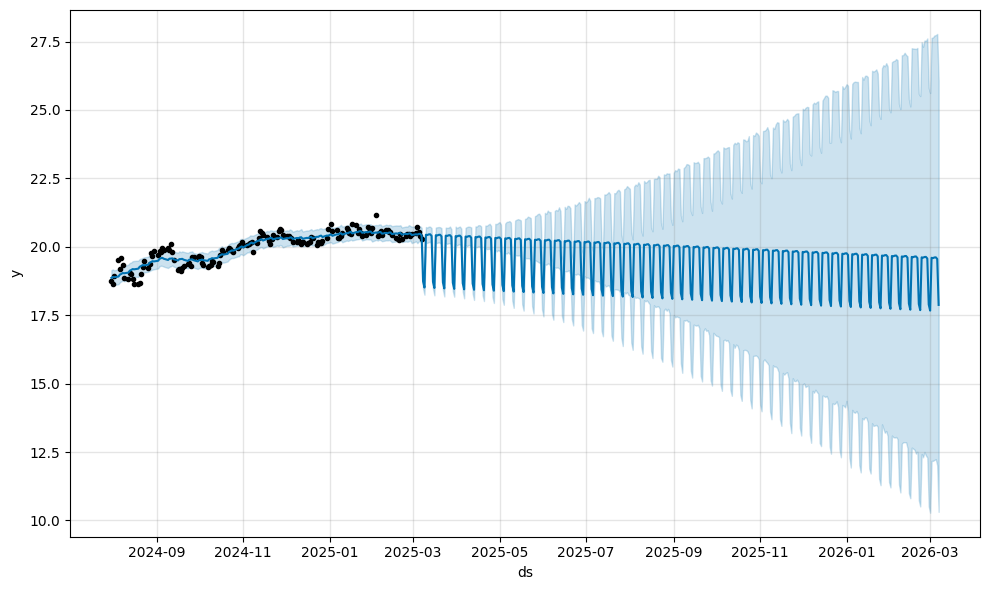

In [30]:
forecast = m.predict(future)
m.plot(forecast)
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error

# Ensure your test set contains actual values (y) and predicted values (yhat)
# We assume that the 'ds' column is used to align actual values with the predicted values

# Merge actual values from the test set with the predicted values from the forecast
merged_df = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

# Calculate the Mean Squared Error
mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.05254705444481763


In [31]:
import pandas as pd
from prophet import Prophet

# Load the data
df = pd.read_csv('/workspaces/mxn-usd-predictor1/src/processed_data/clean_train.csv')

# Rename the columns to match Prophet's expected format
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# Convert 'ds' to datetime, ensuring that time zones are handled correctly by using utc=True
df['ds'] = pd.to_datetime(df['ds'], utc=True, errors='coerce')

In [34]:
# Rename the columns to match Prophet's expected format
df.rename(columns={"Date": "ds", "Close": "y"}, inplace=True)

# Convert 'ds' to datetime, removing any time zone information
df['ds'] = pd.to_datetime(df['ds'], errors='coerce').dt.tz_localize(None)

# Check if there are any missing or invalid dates after conversion
if df['ds'].isnull().any():
    print("Warning: There are invalid or missing dates after conversion.")
else:
    print("Dates successfully converted to datetime.")

Dates successfully converted to datetime.


In [35]:
# Initialize and fit the Prophet model
m = Prophet()
m.fit(df)


02:14:34 - cmdstanpy - INFO - Chain [1] start processing
02:14:34 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Make future predictions (365 days)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
985,2025-07-25 23:00:00
986,2025-07-26 23:00:00
987,2025-07-27 23:00:00
988,2025-07-28 23:00:00
989,2025-07-29 23:00:00


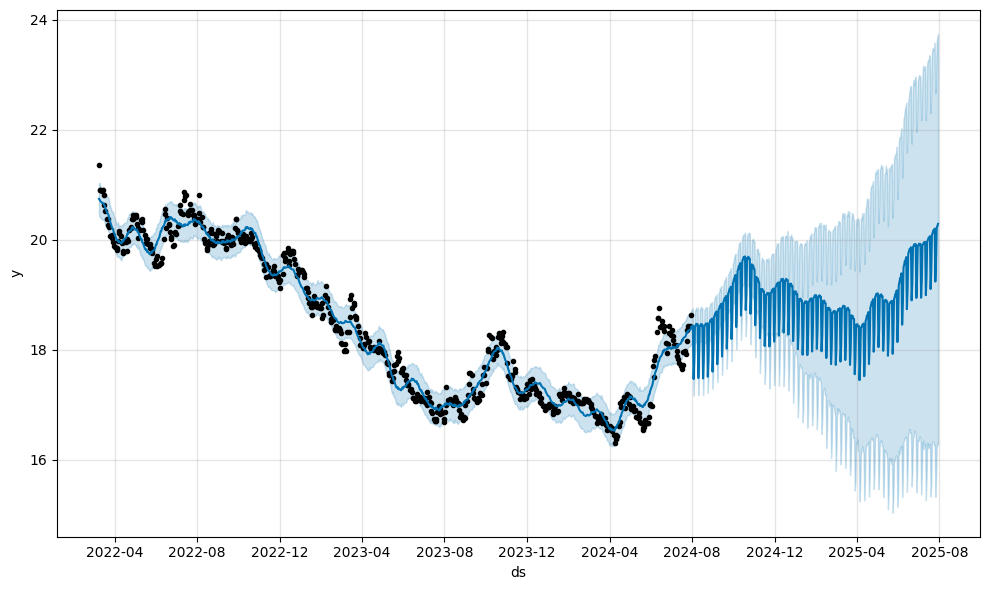

In [37]:
forecast = m.predict(future)
m.plot(forecast)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

# Ensure your test set contains actual values (y) and predicted values (yhat)
# We assume that the 'ds' column is used to align actual values with the predicted values

# Merge actual values from the test set with the predicted values from the forecast
merged_df = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

# Calculate the Mean Squared Error
mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.05254705444481763
